In [1]:

 # IGNORE WARNINGS
import warnings
warnings.filterwarnings('ignore')

# NUMPY PACKAGES
import numpy  as np
# GENERATING RANDOM  OBJECTS

import random 
#  FOR  SYSTEM OPERATIONS

import os

# GENERATING PLOTS
import matplotlib.pyplot as plt

# IMAGE PREPRCESSING
from keras.preprocessing.image import load_img,img_to_array

# DENSENET APPLICATIONS
from keras.applications import DenseNet121
# MODEL OBJECT
from keras.models import Model

# IMAGE OPERATIONS
import cv2

# ONE HOT ENCODING
from keras.utils import to_categorical

# SPLITTING DATA OPERATIONS
from sklearn.model_selection import train_test_split

# TRAINING NEURAL NETWORKS
from keras import regularizers, optimizers

# FULLY CONNCETD LAYERS AND FLATTENING OUTPUT
from keras.layers import Dense,Flatten

 # GENERATING SEQUENTIAL OBJECT
from keras.models import Sequential

# CALL BACKS
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# CLASSIFICATION METRICS
from sklearn.metrics import accuracy_score


# DEEP LEARNING MODEL OBJECTS  TO SAVE
from keras.models import model_from_json

 # DEEP LEARNING  PACKAGE SOURCE API
import keras


Using TensorFlow backend.
C:\Users\anish_yagt7hg\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\anish_yagt7hg\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\anish_yagt7hg\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\anish_yagt7hg\Anaconda3\lib\site-packages\tenso

#### CHANGING THE SYSTEM PATH WHERE ACTUAL DATA EXISTS

In [2]:
os.chdir('C:\\Users\\anish_yagt7hg\\Desktop\\internship\\COVID-19_CLASSIFICATION\\DATA')

In [3]:
os.getcwd()

'C:\\Users\\anish_yagt7hg\\Desktop\\internship\\COVID-19_CLASSIFICATION\\DATA'

In [4]:
#  os.walk()  reads about the directory structure , folders, filenames in it

labels=[]
root_folders=[]
for root,dir,filenames in os.walk(os.getcwd()):
    for i in dir:
        if i != None and i not in ['COVID','NON_COVID']:
            labels.append(i)
    root_folders.append(root)
        

#### root_folders gives a list of folders of images where the data exists

In [5]:

root_folders = [i for i in root_folders if  not i.split('\\')[-1] in [ 'DATA']]
root_folders

['C:\\Users\\anish_yagt7hg\\Desktop\\internship\\COVID-19_CLASSIFICATION\\DATA\\non_covid_Patient_0',
 'C:\\Users\\anish_yagt7hg\\Desktop\\internship\\COVID-19_CLASSIFICATION\\DATA\\non_covid_Patient_1',
 'C:\\Users\\anish_yagt7hg\\Desktop\\internship\\COVID-19_CLASSIFICATION\\DATA\\non_covid_Patient_10',
 'C:\\Users\\anish_yagt7hg\\Desktop\\internship\\COVID-19_CLASSIFICATION\\DATA\\non_covid_Patient_11',
 'C:\\Users\\anish_yagt7hg\\Desktop\\internship\\COVID-19_CLASSIFICATION\\DATA\\non_covid_Patient_12',
 'C:\\Users\\anish_yagt7hg\\Desktop\\internship\\COVID-19_CLASSIFICATION\\DATA\\non_covid_Patient_13',
 'C:\\Users\\anish_yagt7hg\\Desktop\\internship\\COVID-19_CLASSIFICATION\\DATA\\non_covid_Patient_14',
 'C:\\Users\\anish_yagt7hg\\Desktop\\internship\\COVID-19_CLASSIFICATION\\DATA\\non_covid_Patient_15',
 'C:\\Users\\anish_yagt7hg\\Desktop\\internship\\COVID-19_CLASSIFICATION\\DATA\\non_covid_Patient_16',
 'C:\\Users\\anish_yagt7hg\\Desktop\\internship\\COVID-19_CLASSIFICATION\\D

#### labels_and folders maps a tuple in which first element is a path to folder and second element is  label what we are \going to assign to path

In [6]:
labels_and_folders=[(i,j) for i,j in zip(labels,root_folders)]

#### A folders(label,path) FUNCTION WHICH TAKES PATH AS INPUT AND RETURNING A LIST AS APPENDIMG THE PATH TO THE IMAGES IN A LIST

In [7]:
def folders(label,path):
    folder =[os.path.join(path+'\\'+ file) for file in os.listdir(path)]
    return folder

#### READ_IMAGES(DATA) ACCEPTS A LIST OF IAMGES AND TRANSFORM THEM INTO RESPECTED ARRAYS AND RETURNS AS A ARRAY OF FOLDER OF IMAGES

In [8]:
def READ_IMAGES(data):
    dim=(224,224)
    for img in range(len(data)):
        data[img] = cv2.imread(data[img],cv2.IMREAD_COLOR)     # REDAING IMAGES IN RGB MODE
        data[img] =cv2.resize(data[img],dim)                    # RESIZING IMAGE INTO (180 x 180)
        data[img] = data[img]/255                                 #   scaling the value between 0 and 1
        data[img] = cv2.pow(data[img],0.6)                        # applying power transformation for enhancing images 
    return np.array(data)
        

#### feature_vector(model,image) takes input a image array and model as input and returns the mean of features


In [9]:
def feature_vector(model,image):
    ft_vector = model.predict(image)
    feature_vector = np.mean(ft_vector,axis=0)
    return feature_vector
        

#### LABELLING THE TARGET COLUMN ACCORDINGLY BASED ON FOLDER NAME¶

In [10]:
def Label(label):
        if label.startswith('non_covid_Patient'):
            return 0
        else:
            return 1


#### feature_vector2(model,image) takes input a image array and model as input and returns the median of features

In [11]:
### FOR MEDIAN OF FEATURES

def feature_vector2(model,image):
    ft_vector = model.predict(image)
    feature_vector = np.median(ft_vector,axis=0)
    return feature_vector
        

#### DENSENET 121 ON MEAN OF FEATURES

In [12]:
# importing densenet model and excluding the top most layer of architecture
dense_net =DenseNet121(include_top=False,weights ='imagenet',input_shape =(224,224,3))
# creating output object
output =dense_net.layers[-1].output
output = keras.layers.Flatten()(output) # Flattening outpiut layer
 
# creating model instance of input and output
densenet_model = Model(dense_net.input,output)

densenet_model.trainable = False
for layer in densenet_model.layers:
    layer.trainable = False

Instructions for updating:
Colocations handled automatically by placer.


#### CUSTOM FUNCTION FOR PROCESSING THE ABOVE FUNCCTION AND RETURNS THE MEAN OF FEATURES AND TARGET LABEL ACCORDINGLY

In [22]:
def densenet_with_mean(label,path):
    folder =folders(label,path)
    img_list=READ_IMAGES(folder)
    img_list=np.array(img_list)
    img_features =feature_vector(dense_net,img_list)
    target_label = Label(label)
    return img_features,target_label 

#### PROCESSING THE FOLDERS

In [23]:
densenet_data=[]
for i,j in labels_and_folders:
    densenet_data.append(densenet_with_mean(i,j))

In [26]:
# GETTING  LIST OF TARGET VALUES FROM densenetnet_data list
target_label_densenet_mean =[j for i,j in densenet_data]
# converting target into encoding
target_label_densenet_mean=to_categorical(target_label_densenet_mean)


# MEAN OF FEATURES OF IMAGES
features_mean_densenet=[i for i,j in densenet_data]


#### SPLITTING THE TRAINING AND VALIDATION DATA FOR MEAN OF FEATURES¶

In [28]:
densenet_mean_X_train,densenet_mean_X_test,densenet_mean_Y_train,densenet_mean_Y_test = train_test_split(features_mean_densenet,target_label_densenet_mean,test_size=0.2,random_state=141897)

print("THE NO.of Images in Training Data are : {} ".format(len(densenet_mean_X_train)))
print("THE NO.of Images in VALIDATION Data are : {} ".format(len(densenet_mean_X_test)))


THE NO.of Images in Training Data are : 243 
THE NO.of Images in VALIDATION Data are : 61 


In [29]:
densenet_mean_X_train[0].shape

(7, 7, 1024)

#### AS MODEL ACCEPTS ARRAY OF INPUTS CONVERTING LIST OF ARRAYS INTO ONE SINGLE ARRAY OF ARRAYS¶

In [30]:
densenet_mean_X_train =np.array(densenet_mean_X_train)
densenet_mean_X_test =np.array(densenet_mean_X_test)

#### SIMPLE NEURAL NETWORK

In [33]:
densenet_model_mean=Sequential()
densenet_model_mean.add(Dense(256,input_shape=(7,7,1024),activation='sigmoid',kernel_initializer='glorot_uniform',
                kernel_regularizer= regularizers.l2()))


densenet_model_mean.add(Dense(512,activation='sigmoid', kernel_regularizer= regularizers.l2()))
densenet_model_mean.add(Flatten())
densenet_model_mean.add(Dense(2, activation='sigmoid'))



#OPtimizers
adam = keras.optimizers.Adam(lr=0.001, decay=0.0005)

## Callbacks
earlystopper = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
reduce_lr = ReduceLROnPlateau(patience=5, verbose=1)

## Compiling the model and defining loss function
densenet_model_mean.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

## Training neural nets
densenet_mean_history=densenet_model_mean.fit(densenet_mean_X_train, densenet_mean_Y_train,
                                              validation_data=(densenet_mean_X_test,densenet_mean_Y_test),
                                              epochs=100, batch_size=32,
                                              callbacks=[reduce_lr, earlystopper])

Instructions for updating:
Use tf.cast instead.
Train on 243 samples, validate on 61 samples
Epoch 1/100
243/243 [==============================] - 9s 36ms/step - loss: 10.8319 - acc: 0.5967 - val_loss: 11.2635 - val_acc: 0.6557
Epoch 2/100
243/243 [==============================] - 1s 3ms/step - loss: 8.8571 - acc: 0.6564 - val_loss: 8.2572 - val_acc: 0.5000
Epoch 3/100
243/243 [==============================] - 1s 3ms/step - loss: 7.3001 - acc: 0.6831 - val_loss: 7.0421 - val_acc: 0.6557
Epoch 4/100
243/243 [==============================] - 1s 3ms/step - loss: 6.1356 - acc: 0.6420 - val_loss: 6.1135 - val_acc: 0.6557
Epoch 5/100
243/243 [==============================] - 1s 3ms/step - loss: 5.3297 - acc: 0.7119 - val_loss: 5.4187 - val_acc: 0.5000
Epoch 6/100
243/243 [==============================] - 1s 3ms/step - loss: 4.7249 - acc: 0.6296 - val_loss: 4.9443 - val_acc: 0.6557
Epoch 7/100
243/243 [==============================] - 1s 3ms/step - loss: 4.2530 - acc: 0.6420 - val_loss

Epoch 59/100
243/243 [==============================] - 1s 3ms/step - loss: 2.6394 - acc: 0.7119 - val_loss: 3.1186 - val_acc: 0.6557
Epoch 60/100
243/243 [==============================] - 1s 3ms/step - loss: 2.6395 - acc: 0.7119 - val_loss: 3.1140 - val_acc: 0.6557
Epoch 61/100
243/243 [==============================] - 1s 3ms/step - loss: 2.6409 - acc: 0.7119 - val_loss: 3.1117 - val_acc: 0.6557
Epoch 62/100
243/243 [==============================] - 1s 3ms/step - loss: 2.6406 - acc: 0.7119 - val_loss: 3.1170 - val_acc: 0.6557
Epoch 63/100
243/243 [==============================] - 1s 3ms/step - loss: 2.6369 - acc: 0.7119 - val_loss: 3.1102 - val_acc: 0.6557
Epoch 64/100
243/243 [==============================] - 1s 3ms/step - loss: 2.6401 - acc: 0.7119 - val_loss: 3.1230 - val_acc: 0.6557
Epoch 65/100
243/243 [==============================] - 1s 3ms/step - loss: 2.6395 - acc: 0.7119 - val_loss: 3.1090 - val_acc: 0.6557
Epoch 66/100
243/243 [==============================] - 1s 3ms

#### PLOTTING THE LOSS AND ACCURACY OF MODEL WITH MEAN OF FEATURES

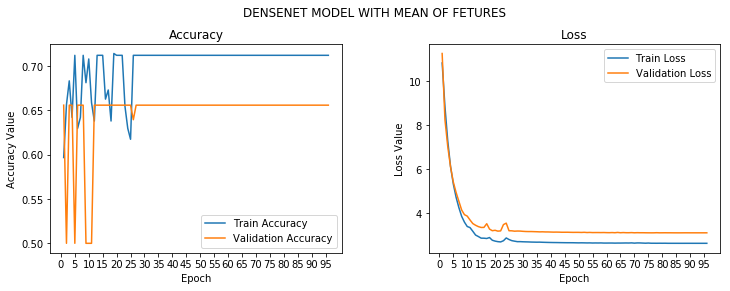

In [34]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('DENSENET MODEL WITH MEAN OF FETURES', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,97))
ax1.plot(epoch_list, densenet_mean_history.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list,densenet_mean_history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 97, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, densenet_mean_history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, densenet_mean_history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 97, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

#### PREDICTIONS BASED ON MEAN OF FEATURES

In [35]:
densenet_mean_pred_train =densenet_model_mean.predict_classes(densenet_mean_X_train)
densenet_mean_pred_test =densenet_model_mean.predict_classes(densenet_mean_X_test)


#### INVERSE TRANSFORMING THE LABELS

In [36]:
densenet_labels_train = np.argmax(densenet_mean_Y_train,axis=1)
densenet_labels_test = np.argmax(densenet_mean_Y_test,axis=1)


#### METRIC SCORE FOR THE MODEL

In [39]:
print("ACCURACY SCORE OF DENSENET 121 with MEAN OF FEATURES ON TRAINING SET IS :{}".
      format(accuracy_score(densenet_labels_train,densenet_mean_pred_train)))
      
      
print("ACCURACY SCORE OF DENSENET 121 with MEAN OF FEATURES ON TEST SET IS :{}".
      format(accuracy_score(densenet_labels_test,densenet_mean_pred_test)))
      
      
            

ACCURACY SCORE OF DENSENET 121 with MEAN OF FEATURES ON TRAINING SET IS :0.7119341563786008
ACCURACY SCORE OF DENSENET 121 with MEAN OF FEATURES ON TEST SET IS :0.6557377049180327


#### SAVING MODEL WEIGHTS AND MODEL

In [58]:
# serialize model to JSON
model_json = densenet_model_mean.to_json()
with open("densenet_model_mean.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
densenet_model_mean.save_weights("densenet_model_mean.h5")
print("Saved model to disk")


Saved model to disk


#### DENSENET  121 WITH MEDIAN OF FEATURES

#### CUSTOM FUNCTION FOR PROCESSING THE ABOVE FUNCCTION AND RETURNS THE MEDIAN OF FEATURES AND TARGET LABEL ACCORDINGLY

In [40]:
def densenet_with_median(label,path):
    folder =folders(label,path)
    img_list=READ_IMAGES(folder)
    img_list=np.array(img_list)
    img_features =feature_vector2(dense_net,img_list)
    target_label = Label(label)
    return img_features,target_label 

#### PROCESSING THE FOLDERS

In [43]:
densenet_data2=[]
for i,j in labels_and_folders:
       %time densenet_data2.append(densenet_with_median(i,j))

Wall time: 5.74 s
Wall time: 7.16 s
Wall time: 6.37 s
Wall time: 5.72 s
Wall time: 4.33 s
Wall time: 7.13 s
Wall time: 7.92 s
Wall time: 10 s
Wall time: 4.33 s
Wall time: 6.4 s
Wall time: 7.74 s
Wall time: 5.97 s
Wall time: 12.1 s
Wall time: 4.43 s
Wall time: 5.01 s
Wall time: 5.77 s
Wall time: 4.35 s
Wall time: 6.37 s
Wall time: 7.07 s
Wall time: 7.04 s
Wall time: 4.42 s
Wall time: 5.03 s
Wall time: 7.11 s
Wall time: 7.14 s
Wall time: 8.57 s
Wall time: 7.33 s
Wall time: 9.86 s
Wall time: 5.06 s
Wall time: 4.35 s
Wall time: 5.81 s
Wall time: 5.77 s
Wall time: 7.12 s
Wall time: 6.4 s
Wall time: 12.8 s
Wall time: 8.47 s
Wall time: 4.98 s
Wall time: 4.35 s
Wall time: 4.35 s
Wall time: 6.82 s
Wall time: 7.83 s
Wall time: 5.07 s
Wall time: 4.48 s
Wall time: 5.15 s
Wall time: 4.37 s
Wall time: 5.23 s
Wall time: 9.93 s
Wall time: 5.1 s
Wall time: 7.21 s
Wall time: 5.49 s
Wall time: 4.8 s
Wall time: 6.4 s
Wall time: 4.38 s
Wall time: 6.5 s
Wall time: 7.22 s
Wall time: 3.78 s
Wall time: 5.77 s


In [44]:
# GETTING  LIST OF TARGET VALUES FROM densenet_data2 list
target_label_densenet_median =[j for i,j in densenet_data2]
# converting target into encoding
target_label_densenet_median=to_categorical(target_label_densenet_median)

# MEDIAN OF FEATURES OF IMAGES
features_median_densenet=[i for i,j in densenet_data2]


#### SPLITTING THE TRAINING AND VALIDATION DATA FOR MEDIAN OF FEATURES

In [46]:
densenet_median_X_train,densenet_median_X_test,densenet_median_Y_train,densenet_median_Y_test = train_test_split(features_median_densenet,target_label_densenet_median,test_size=0.2,random_state=141896)

print("THE NO.of Images in Training Data are : {} ".format(len(densenet_median_X_train)))
print("THE NO.of Images in VALIDATION Data are : {} ".format(len(densenet_median_X_test)))


THE NO.of Images in Training Data are : 243 
THE NO.of Images in VALIDATION Data are : 61 


#### AS MODEL ACCEPTS ARRAY OF INPUTS CONVERTING LIST OF ARRAYS INTO ONE SINGLE ARRAY OF ARRAYS

In [47]:
densenet_median_X_train =np.array(densenet_median_X_train)
densenet_median_X_test =np.array(densenet_median_X_test)

#### SIMPLE NEURAL NETWORK

In [48]:
densenet_model_median=Sequential()
densenet_model_median.add(Dense(256,input_shape=(7,7,1024),activation='sigmoid',kernel_initializer='glorot_uniform',
                kernel_regularizer= regularizers.l2()))


densenet_model_median.add(Dense(512,activation='sigmoid', kernel_regularizer= regularizers.l2()))
densenet_model_median.add(Flatten())
densenet_model_median.add(Dense(2, activation='sigmoid'))



#OPtimizers
adam = keras.optimizers.Adam(lr=0.001, decay=0.0005)

## Callbacks
earlystopper = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
reduce_lr = ReduceLROnPlateau(patience=5, verbose=1)

## Compiling the model and defining loss function
densenet_model_median.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

## Training neural nets
densenet_median_history=densenet_model_median.fit(densenet_median_X_train, densenet_median_Y_train,
                                              validation_data=(densenet_median_X_test,densenet_median_Y_test),
                                              epochs=100, batch_size=32,
                                              callbacks=[reduce_lr, earlystopper])

Train on 243 samples, validate on 61 samples
Epoch 1/100
243/243 [==============================] - 8s 35ms/step - loss: 8.3541 - acc: 0.5638 - val_loss: 7.0223 - val_acc: 0.6721
Epoch 2/100
243/243 [==============================] - 1s 3ms/step - loss: 6.2713 - acc: 0.6173 - val_loss: 5.6334 - val_acc: 0.6721
Epoch 3/100
243/243 [==============================] - 1s 3ms/step - loss: 5.0076 - acc: 0.5844 - val_loss: 4.4413 - val_acc: 0.6721
Epoch 4/100
243/243 [==============================] - 1s 3ms/step - loss: 3.8965 - acc: 0.5658 - val_loss: 3.5446 - val_acc: 0.6721
Epoch 5/100
243/243 [==============================] - 1s 3ms/step - loss: 3.1559 - acc: 0.5556 - val_loss: 2.8723 - val_acc: 0.6721
Epoch 6/100
243/243 [==============================] - 1s 3ms/step - loss: 2.5772 - acc: 0.6049 - val_loss: 2.2385 - val_acc: 0.6721
Epoch 7/100
243/243 [==============================] - 1s 3ms/step - loss: 2.1054 - acc: 0.6543 - val_loss: 1.8604 - val_acc: 0.6721
Epoch 8/100
243/243 [==

#### PLOTTING THE LOSS AND ACCURACY OF MODEL WITH MEDIAN OF FEATURES

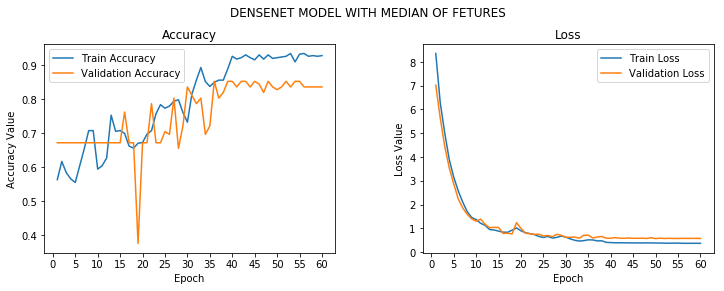

In [54]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('DENSENET MODEL WITH MEDIAN OF FETURES', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,61))
ax1.plot(epoch_list, densenet_median_history.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list,densenet_median_history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 61, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, densenet_median_history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, densenet_median_history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 61, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

#### PREDICTIONS BASED ON MEDIAN OF FEATURES

In [51]:
densenet_median_pred_train =densenet_model_mean.predict_classes(densenet_median_X_train)
densenet_median_pred_test =densenet_model_mean.predict_classes(densenet_median_X_test)


#### INVERSE TRANSFORMING THE LABELS

In [52]:
densenet_labels_median_train = np.argmax(densenet_median_Y_train,axis=1)
densenet_labels_median_test = np.argmax(densenet_median_Y_test,axis=1)


In [53]:
print("ACCURACY SCORE OF DENSENET 121 with MEDIAN OF FEATURES ON TRAINING SET IS :{}".
      format(accuracy_score(densenet_labels_median_train,densenet_median_pred_train)))
      
      
print("ACCURACY SCORE OF DENSENET 121 with MEDIAN OF FEATURES ON TEST SET IS :{}".
      format(accuracy_score(densenet_labels_median_test,densenet_median_pred_test)))
      
      
            

ACCURACY SCORE OF DENSENET 121 with MEDIAN OF FEATURES ON TRAINING SET IS :0.7078189300411523
ACCURACY SCORE OF DENSENET 121 with MEDIAN OF FEATURES ON TEST SET IS :0.6721311475409836


#### MODEL SERIALIZATION

In [59]:
# serialize model to JSON
model_json = densenet_model_median.to_json()
with open("densenet_model_median.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
densenet_model_median.save_weights("densenet_model_median.h5")
print("Saved model to disk")


Saved model to disk


#### DENSENET WITH INTERMEDIATE LAYER PREDICTION WITH MEAN OF FEATURES

In [14]:
densenet_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
zero_padding2d_3 (ZeroPadding2D (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d_3[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
__________________________________________________________________________________________________
conv1/relu

#### GETTING LAYER FROM INPUT TO  THIRD DENSE BLOCK

In [17]:
dense_net =DenseNet121(weights ='imagenet',input_shape =(224,224,3))
output =dense_net.get_layer('pool3_pool').output
densenet_model1 = Model(dense_net.input,output)

densenet_model1.trainable = False
for layer in densenet_model1.layers:
    layer.trainable = False

In [19]:
densenet_model1.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
zero_padding2d_7 (ZeroPadding2D (None, 230, 230, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d_7[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
__________________________________________________________________________________________________
conv1/relu

In [21]:
def densenetarb_with_mean(label,path):
    folder =folders(label,path)
    img_list=READ_IMAGES(folder)
    img_list=np.array(img_list)
    img_features =feature_vector(densenet_model1,img_list)
    target_label = Label(label)
    return img_features,target_label 

In [23]:
densenetarb_data=[]
for i,j in labels_and_folders:
    densenetarb_data.append(densenetarb_with_mean(i,j))

In [25]:
target_label_densenetarb_mean =[j for i,j in densenetarb_data]
target_label_densenetarb_mean=to_categorical(target_label_densenetarb_mean)
features_mean_densenetarb=[i for i,j in densenetarb_data]


In [26]:
densenetarb_mean_X_train,densenetarb_mean_X_test,densenetarb_mean_Y_train,densenetarb_mean_Y_test = train_test_split(features_mean_densenetarb,target_label_densenetarb_mean,test_size=0.2,random_state=131897)

print("THE NO.of Images in Training Data are : {} ".format(len(densenetarb_mean_X_train)))
print("THE NO.of Images in VALIDATION Data are : {} ".format(len(densenetarb_mean_X_test)))


THE NO.of Images in Training Data are : 243 
THE NO.of Images in VALIDATION Data are : 61 


In [27]:
densenetarb_mean_X_train =np.array(densenetarb_mean_X_train)
densenetarb_mean_X_test =np.array(densenetarb_mean_X_test)

In [28]:
densenetarb_model_mean=Sequential()
densenetarb_model_mean.add(Dense(256,input_shape=(14,14,256),activation='sigmoid',kernel_initializer='glorot_uniform',
                kernel_regularizer= regularizers.l2()))


densenetarb_model_mean.add(Dense(512,activation='sigmoid', kernel_regularizer= regularizers.l2()))
densenetarb_model_mean.add(Flatten())
densenetarb_model_mean.add(Dense(2, activation='sigmoid'))



#OPtimizers
adam = keras.optimizers.Adam(lr=0.001, decay=0.0005)

## Callbacks
earlystopper = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
reduce_lr = ReduceLROnPlateau(patience=5, verbose=1)

## Compiling the model and defining loss function
densenetarb_model_mean.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

## Training neural nets
densenetarb_mean_history=densenetarb_model_mean.fit(densenetarb_mean_X_train, densenetarb_mean_Y_train,
                                              validation_data=(densenetarb_mean_X_test,densenetarb_mean_Y_test),
                                              epochs=100, batch_size=32,
                                              callbacks=[reduce_lr, earlystopper])

Instructions for updating:
Use tf.cast instead.
Train on 243 samples, validate on 61 samples
Epoch 1/100
243/243 [==============================] - 13s 53ms/step - loss: 9.4611 - acc: 0.6749 - val_loss: 10.6134 - val_acc: 0.6393
Epoch 2/100
243/243 [==============================] - 2s 6ms/step - loss: 8.9077 - acc: 0.7160 - val_loss: 9.4995 - val_acc: 0.6393
Epoch 3/100
243/243 [==============================] - 2s 6ms/step - loss: 7.8732 - acc: 0.7160 - val_loss: 8.5827 - val_acc: 0.6393
Epoch 4/100
243/243 [==============================] - 1s 6ms/step - loss: 7.0391 - acc: 0.7160 - val_loss: 7.8615 - val_acc: 0.6393
Epoch 5/100
243/243 [==============================] - 2s 6ms/step - loss: 6.3903 - acc: 0.7160 - val_loss: 7.3088 - val_acc: 0.6393
Epoch 6/100
243/243 [==============================] - 2s 6ms/step - loss: 5.8967 - acc: 0.7160 - val_loss: 6.8925 - val_acc: 0.6393
Epoch 7/100
243/243 [==============================] - 1s 6ms/step - loss: 5.5269 - acc: 0.7160 - val_loss

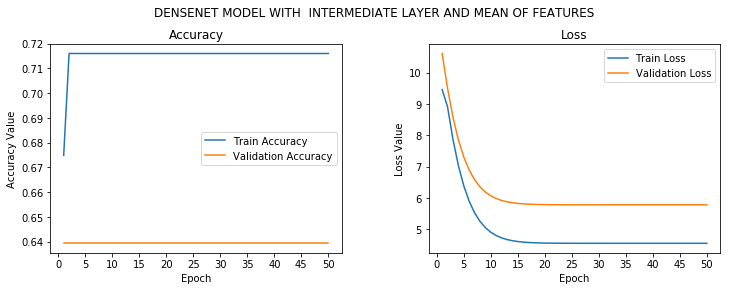

In [29]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('DENSENET MODEL WITH  INTERMEDIATE LAYER AND MEAN OF FEATURES', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,51))
ax1.plot(epoch_list, densenetarb_mean_history.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list,densenetarb_mean_history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 51, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, densenetarb_mean_history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, densenetarb_mean_history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 51, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [47]:
densenetarb_mean_pred_train =densenetarb_model_mean.predict_classes(densenetarb_mean_X_train)
densenetarb_mean_pred_test =densenetarb_model_mean.predict_classes(densenetarb_mean_X_test)


In [48]:
densenet_labels_train = np.argmax(densenetarb_mean_Y_train,axis=1)
densenet_labels_test = np.argmax(densenetarb_mean_Y_test,axis=1)


In [49]:
print("ACCURACY SCORE OF DENSENET 121 with MEAN OF FEATURES ON TRAINING SET IS :{}".
      format(accuracy_score(densenet_labels_train,densenetarb_mean_pred_train)))
      
      
print("ACCURACY SCORE OF DENSENET 121 with MEAN OF FEATURES ON TEST SET IS :{}".
      format(accuracy_score(densenet_labels_test,densenetarb_mean_pred_test)))
      
      
            

ACCURACY SCORE OF DENSENET 121 with MEAN OF FEATURES ON TRAINING SET IS :0.7160493827160493
ACCURACY SCORE OF DENSENET 121 with MEAN OF FEATURES ON TEST SET IS :0.639344262295082


In [50]:
# serialize model to JSON
model_json = densenetarb_model_mean.to_json()
with open("densenetarb_model_mean.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
densenetarb_model_mean.save_weights("densenetarb_model_mean.h5")
print("Saved model to disk")


Saved model to disk


#### DENSENET WITH INTERMEDIATE LAYER OF MEDIAN OF FEATURES

In [31]:
def densenetarb_with_median(label,path):
    folder =folders(label,path)
    img_list=READ_IMAGES(folder)
    img_list=np.array(img_list)
    img_features =feature_vector2(densenet_model1,img_list)
    target_label = Label(label)
    return img_features,target_label 

In [32]:
densenetarb_data1=[]
for i,j in labels_and_folders:
    densenetarb_data1.append(densenetarb_with_median(i,j))

In [33]:
target_label_densenetarb_median =[j for i,j in densenetarb_data1]
target_label_densenetarb_median=to_categorical(target_label_densenetarb_median)
features_median_densenetarb=[i for i,j in densenetarb_data1]


In [34]:
densenetarb_median_X_train,densenetarb_median_X_test,densenetarb_median_Y_train,densenetarb_median_Y_test = train_test_split(features_median_densenetarb,target_label_densenetarb_median,test_size=0.2,random_state=131897)

print("THE NO.of Images in Training Data are : {} ".format(len(densenetarb_median_X_train)))
print("THE NO.of Images in VALIDATION Data are : {} ".format(len(densenetarb_median_X_test)))


THE NO.of Images in Training Data are : 243 
THE NO.of Images in VALIDATION Data are : 61 


In [35]:
densenetarb_median_X_train =np.array(densenetarb_median_X_train)
densenetarb_median_X_test =np.array(densenetarb_median_X_test)

In [36]:
densenetarb_model_median=Sequential()
densenetarb_model_median.add(Dense(256,input_shape=(14,14,256),activation='sigmoid',kernel_initializer='glorot_uniform',
                kernel_regularizer= regularizers.l2()))


densenetarb_model_median.add(Dense(512,activation='sigmoid', kernel_regularizer= regularizers.l2()))
densenetarb_model_median.add(Flatten())
densenetarb_model_median.add(Dense(2, activation='sigmoid'))



#OPtimizers
adam = keras.optimizers.Adam(lr=0.001, decay=0.0005)

## Callbacks
earlystopper = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
reduce_lr = ReduceLROnPlateau(patience=5, verbose=1)

## Compiling the model and defining loss function
densenetarb_model_median.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

## Training neural nets
densenetarb_median_history=densenetarb_model_median.fit(densenetarb_median_X_train, densenetarb_median_Y_train,
                                              validation_data=(densenetarb_median_X_test,densenetarb_median_Y_test),
                                              epochs=100, batch_size=32,
                                              callbacks=[reduce_lr, earlystopper])

Train on 243 samples, validate on 61 samples
Epoch 1/100
243/243 [==============================] - 13s 53ms/step - loss: 9.5254 - acc: 0.6749 - val_loss: 10.6785 - val_acc: 0.6393
Epoch 2/100
243/243 [==============================] - 1s 6ms/step - loss: 8.9793 - acc: 0.7160 - val_loss: 9.5770 - val_acc: 0.6393
Epoch 3/100
243/243 [==============================] - 1s 6ms/step - loss: 7.9511 - acc: 0.7160 - val_loss: 8.6593 - val_acc: 0.6393
Epoch 4/100
243/243 [==============================] - 1s 6ms/step - loss: 7.1128 - acc: 0.7160 - val_loss: 7.9304 - val_acc: 0.6393
Epoch 5/100
243/243 [==============================] - 2s 7ms/step - loss: 6.4550 - acc: 0.7160 - val_loss: 7.3672 - val_acc: 0.6393
Epoch 6/100
243/243 [==============================] - 2s 8ms/step - loss: 5.9507 - acc: 0.7160 - val_loss: 6.9402 - val_acc: 0.6393
Epoch 7/100
243/243 [==============================] - 2s 8ms/step - loss: 5.5704 - acc: 0.7160 - val_loss: 6.6207 - val_acc: 0.6393
Epoch 8/100
243/243 [

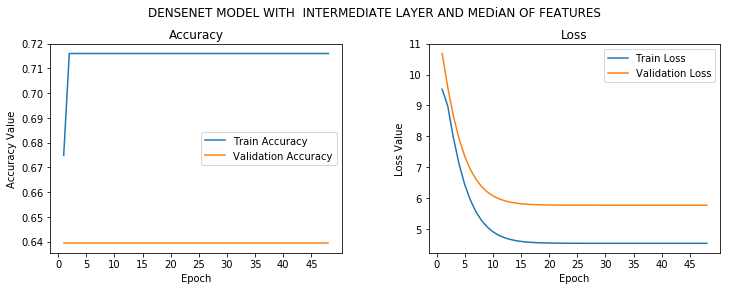

In [38]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('DENSENET MODEL WITH  INTERMEDIATE LAYER AND MEDiAN OF FEATURES', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,49))
ax1.plot(epoch_list, densenetarb_median_history.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list,densenetarb_median_history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 49, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, densenetarb_median_history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, densenetarb_median_history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 49, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [43]:
densenetarb_median_pred_train =densenetarb_model_median.predict_classes(densenetarb_median_X_train)
densenetarb_median_pred_test =densenetarb_model_median.predict_classes(densenetarb_median_X_test)


In [44]:
densenet_labels_train = np.argmax(densenetarb_median_Y_train,axis=1)
densenet_labels_test = np.argmax(densenetarb_median_Y_test,axis=1)


In [45]:
print("ACCURACY SCORE OF DENSENET 121 with MEDIAN OF FEATURES ON TRAINING SET IS :{}".
      format(accuracy_score(densenet_labels_train,densenetarb_median_pred_train)))
      
      
print("ACCURACY SCORE OF DENSENET 121 with MEDIAN OF FEATURES ON TEST SET IS :{}".
      format(accuracy_score(densenet_labels_test,densenetarb_median_pred_test)))
      
      
            

ACCURACY SCORE OF DENSENET 121 with MEDIAN OF FEATURES ON TRAINING SET IS :0.7160493827160493
ACCURACY SCORE OF DENSENET 121 with MEDIAN OF FEATURES ON TEST SET IS :0.639344262295082


#### SAVING MODEL

In [51]:
# serialize model to JSON
model_json = densenetarb_model_median.to_json()
with open("densenetarb_model_median.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
densenetarb_model_median.save_weights("densenetarb_model_median.h5")
print("Saved model to disk")


Saved model to disk
